In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/christynatalia/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('Games_sales.csv')
data.tail()

,Name,Sales,Series,Release,Genre,Developer,Publisher
172,Who Wants to Be a Millionaire?,1.0,NaN,11/1/1999,Trivia game,Jellyvision,Disney Interactive Studios
173,Wing Commander 3: Heart of the Tiger,1.0,Wing Commander,12/1/1994,Space combat simulation,Origin Systems,Electronic Arts
174,Zoo Tycoon,1.0,Zoo Tycoon,10/1/2001,Business simulation,Microsoft,Blue Fang Games
175,StarCraft II: Heart of the Swarm,1.0,StarCraft,3/1/2013,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment
176,StarCraft II: Legacy of the Void,1.0,StarCraft,11/1/2015,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       177 non-null    object 
 1   Sales      177 non-null    float64
 2   Series     141 non-null    object 
 3   Release    177 non-null    object 
 4   Genre      177 non-null    object 
 5   Developer  177 non-null    object 
 6   Publisher  177 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.8+ KB


In [4]:
data_format_date = data.copy()
data_format_date['Release'] = pd.to_datetime(data_format_date['Release'])

In [5]:
data_format_date.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,2011-05-01,Action-adventure,Re-Logic,Re-Logic


In [6]:
data_format_date.columns

Index(['Name', 'Sales', 'Series', 'Release', 'Genre', 'Developer',
       'Publisher'],
      dtype='object')

In [7]:
for every_col in ['Name', 'Sales', 'Series', 'Release', 'Genre', 'Developer',
       'Publisher']:
    print(data_format_date[every_col].value_counts(), "\n")

StarCraft II: Heart of the Swarm    2
StarCraft II: Legacy of the Void    2
PlayerUnknown's Battlegrounds       1
Duke Nukem 3D                       1
Crysis Warhead                      1
                                   ..
Battlefield 1942                    1
Black & White                       1
Civilization III                    1
Cossacks II: Napoleonic Wars        1
Zoo Tycoon                          1
Name: Name, Length: 175, dtype: int64 

1.0     79
2.0     33
3.0      9
4.0      7
2.5      5
1.5      4
6.0      4
5.0      4
1.3      3
20.0     2
5.5      2
1.1      2
1.2      2
9.0      2
10.0     2
11.0     2
12.0     2
2.7      1
2.1      1
1.8      1
42.0     1
3.3      1
3.6      1
33.0     1
6.5      1
7.0      1
8.0      1
14.0     1
17.2     1
4.5      1
Name: Sales, dtype: int64 

StarCraft                6
Command & Conquer        5
Civilization             4
Age of Empires           4
Warcraft                 3
                        ..
Alice                 

In [8]:
data_format_date[data_format_date.duplicated()]

,Name,Sales,Series,Release,Genre,Developer,Publisher
175,StarCraft II: Heart of the Swarm,1.0,StarCraft,2013-03-01,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment
176,StarCraft II: Legacy of the Void,1.0,StarCraft,2015-11-01,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment


In [9]:
data_clean = data_format_date.drop_duplicates()

In [10]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       175 non-null    object        
 1   Sales      175 non-null    float64       
 2   Series     139 non-null    object        
 3   Release    175 non-null    datetime64[ns]
 4   Genre      175 non-null    object        
 5   Developer  175 non-null    object        
 6   Publisher  175 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 10.9+ KB


In [11]:
data_clean.sort_values(by = ['Release'], ascending = True).head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
133,Hydlide,1.0,Hydlide,1984-12-01,Action role-playing,Technology and Entertainment Software,Technology and Entertainment Software
34,Where in the World Is Carmen Sandiego?,4.0,Carmen Sandiego,1985-06-01,Educational,Broderbund,Broderbund
88,International Karate,1.5,International Karate,1985-11-01,Fighting,System 3,Epyx
162,Tetris,1.0,Tetris,1988-01-01,Puzzle,Spectrum HoloByte,Spectrum HoloByte
22,Last Ninja 2,5.5,The Last Ninja,1988-08-01,Action-adventure,System 3,Activision


In [12]:
data_clean.sort_values(by = ['Release'], ascending = False).head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
20,Valheim,6.0,NaN,2021-02-01,Survival,Iron Gate,Coffee Stain Publishing
27,Cyberpunk 2077,4.5,NaN,2020-12-01,Action role-playing,CD Projekt Red,CD Projekt
110,Crusader Kings III,1.0,Crusader Kings,2020-09-01,Grand strategy,Paradox Development Studio,Paradox Interactive
10,Fall Guys,10.0,NaN,2020-08-01,Battle royale,Mediatonic,Devolver Digital
139,Mordhau,1.0,NaN,2019-04-01,Action,Triternion,Triternion


In [13]:
agg_publisher = data_clean.groupby('Publisher', as_index = False)['Name'].nunique()
agg_publisher.sort_values(by=['Name'], ascending = False)

,Publisher,Name
28,Electronic Arts,19
8,Blizzard Entertainment,8
62,Paradox Interactive,7
2,Activision,6
37,GT Interactive,5
...,...,...
36,Frontier Developments,1
35,Facepunch Studios,1
34,FX Interactive,1
33,Epyx,1


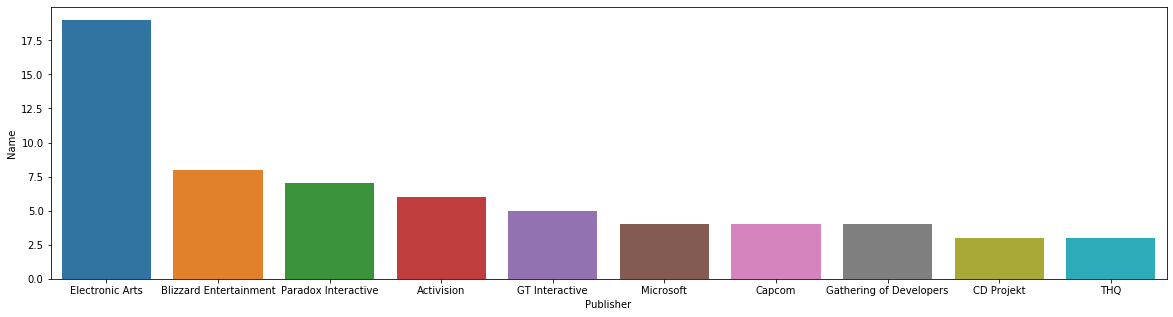

In [14]:
plt.rcParams["figure.figsize"] = (20,5)
sns.barplot(data = agg_publisher.sort_values('Name', ascending = False).iloc[0:10], x = 'Publisher', y = 'Name')

In [16]:
agg_developer = data_clean.groupby('Developer', as_index = False)['Name'].nunique()
agg_developer.sort_values(by=['Name'], ascending = False)

,Developer,Name
6,Blizzard Entertainment,8
60,Maxis,6
70,Paradox Development Studio,5
108,id Software,4
106,Westwood Studios,4
...,...,...
48,Introversion Software,1
47,Infocom,1
44,Heuristic Park,1
42,Gray Matter Interactive,1


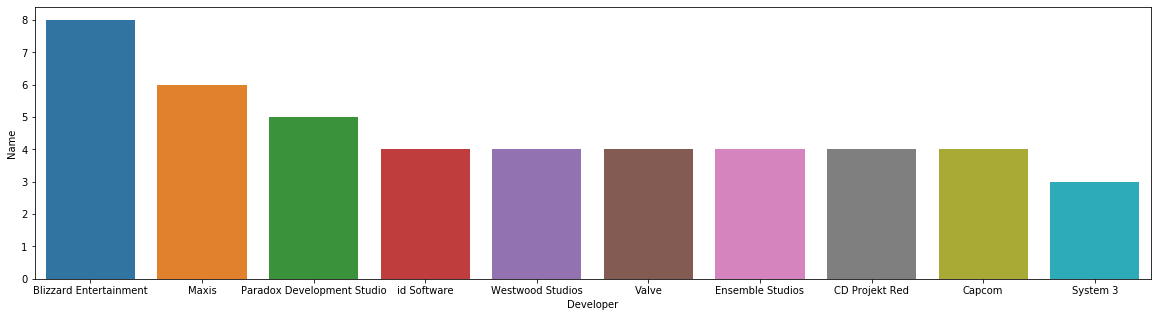

In [17]:
sns.barplot(data = agg_developer.sort_values('Name', ascending = False).iloc[0:10], x = 'Developer', y = 'Name')

In [18]:
agg_sales = data_clean.groupby('Series', as_index = False)['Sales'].sum()
agg_sales.sort_values('Sales', ascending = False)

,Series,Sales
47,Minecraft,33.0
22,Diablo,26.0
75,The Sims,24.0
36,Half-Life,21.0
85,Warcraft,19.0
...,...,...
60,RoboCop,1.0
46,Microsoft Flight Simulator,1.0
58,Railroad Tycoon,1.0
56,Psychonauts,1.0


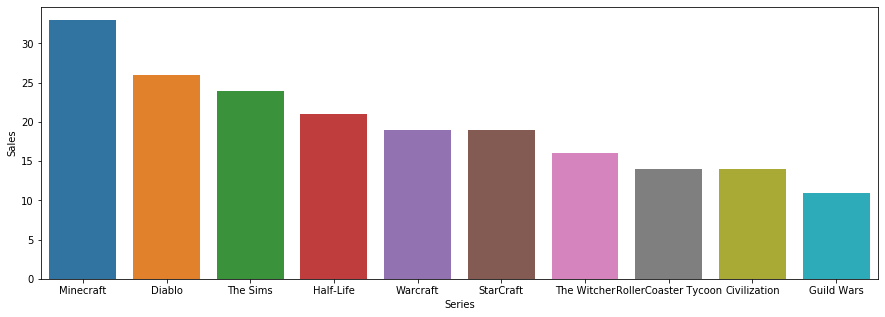

In [19]:
plt.rcParams["figure.figsize"] = (15,5)
sns.barplot(data = agg_sales.sort_values('Sales', ascending = False).iloc[0:10], x = "Series", y="Sales")

In [20]:
agg_names = data_clean.groupby('Series', as_index = False)['Name'].count()
agg_names.sort_values('Name', ascending = False)

,Series,Name
13,Command & Conquer,5
68,StarCraft,4
2,Age of Empires,4
12,Civilization,4
20,Dark Souls,3
...,...,...
41,International Karate,1
40,Hydlide,1
38,Hearts of Iron,1
37,Harry Potter,1


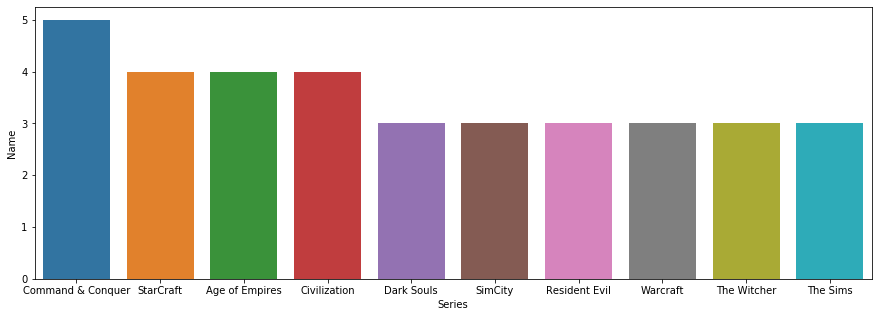

In [21]:
sns.barplot(data = agg_names.sort_values('Name', ascending = False).iloc[0:10], x = "Series", y="Name")